## Amaç

* Mutluluk seviyelerini belirlemek için 6 faktör -ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik - göz önüne alınmaktadır. Amaç günümüz dünyasında daha mutlu toplumlar oluşmasına katkı sağlamak için aşağıdaki gibi sorulara cevaplar arayabilmektir.

* Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?
* 2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?
Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?


### Veriyi Yükleme

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df_2015 = pd.read_csv('data/2015.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')

### İlk Bakış

In [3]:
df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

* Datasetimizin hangi **yıl**a ait olduğunu belirten bir column yok. Tüm datasetleri kontrol edelim.

In [5]:
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


* Tüm datasetlerin columnlarını görüntülediğimizde görüyoruz ki, bazı column'lar bazı datasetlerde hiç yok ve kimi columnların isimleri farklı: ``Country`` ve ``Region`` columnları yerine sadece ``Country`` columnu ve kimi noktalama hataları gibi. Her bir df'imiz için bunları temizlememiz gerekli. Tüm dataframe'lere ``Year`` ekleyerek işe başlayalım.

In [6]:
df_2015 = df_2015.assign(Year = 2015)
df_2016 = df_2016.assign(Year = 2016)
df_2017 = df_2017.assign(Year = 2017)

In [7]:
print(df_2015['Year'])
print(df_2016['Year'])
print(df_2017['Year'])

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
153    2015
154    2015
155    2015
156    2015
157    2015
Name: Year, Length: 158, dtype: int64
0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
152    2016
153    2016
154    2016
155    2016
156    2016
Name: Year, Length: 157, dtype: int64
0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
150    2017
151    2017
152    2017
153    2017
154    2017
Name: Year, Length: 155, dtype: int64


In [8]:
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')


### Column İsimlerini Düzenleme

* 2017 dataframe'inin column isimlerini düzelterek işe başlayalım. En sorunluları manuel düzeltelim.

In [9]:
df_2017 = df_2017.rename(columns = {
    'Economy..GDP.per.Capita.': 'Economy_(GDP_per_Capita)', 
    'Health..Life.Expectancy.' : 'Health_(Life_Expectancy)',
    'Trust..Government.Corruption.': 'Trust_(Government_Corruption)'
})                       

In [10]:
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Generosity',
       'Trust_(Government_Corruption)', 'Dystopia.Residual', 'Year'],
      dtype='object')


* Sözcük aralarında nokta problemi olanları ise otomatik düzeltelim. Boşluklar yerine "_" getirelim.

In [11]:
df_2015.columns = df_2015.columns.str.replace(' ', '_')
df_2016.columns = df_2016.columns.str.replace(' ', '_')
df_2017.columns = df_2017.columns.str.replace('.', '_')

In [12]:
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Generosity',
       'Trust_(Government_Corruption)', 'Dystopia_Residual', 'Year'],
      dtype='object')


### Missing Values

In [13]:
df_2015.isnull().sum()

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
Year                             0
dtype: int64

In [14]:
df_2016.isnull().sum()

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Lower_Confidence_Interval        0
Upper_Confidence_Interval        0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
Year                             0
dtype: int64

In [15]:
df_2017.isnull().sum()

Country                          0
Happiness_Rank                   0
Happiness_Score                  0
Whisker_high                     0
Whisker_low                      0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Generosity                       0
Trust_(Government_Corruption)    0
Dystopia_Residual                0
Year                             0
dtype: int64

* Hiçbir verisetimizde null değer yok. Fakat **analizimizde kullanmayacağımız** ve tüm verisetlerimizde **ortak olmayan** columnları verisetlerimizden atalım.

In [16]:
df_2017 = df_2017.drop(columns =['Whisker_high', 'Whisker_low'])
df_2016 = df_2016.drop(columns = ['Lower_Confidence_Interval','Upper_Confidence_Interval'])
df_2015 = df_2015.drop(columns = ['Standard_Error'])

* 2017 verisetimizde ``Region`` columnu eksik. Bunu ``2016 veri seti`` ile kıyaslayarak ekleyeceğim.

In [17]:
regions = []

# loop
for index, row in df_2017.iterrows():
    # kıyaslayacağımız country değeri
    country = row['Country']
    
    #  df_2016'de o country'ye karşılık gelen region değeri
    region = df_2016.loc[df_2016['Country'] == country, 'Region']
    
    # dataframe'de o ülke yoksa,
    if region.empty:
        # eğer yoksa, default değer ata
        region = 'N/A'
        print(f'"{country}" 2016 verisetinde bulunamadı')
    else:
        
        region = region.iloc[0]
    
    # bölge ismili listeye ekle
    regions.append(region)

# 2017 dataframe'ine bölgeyi ekle
df_2017['Region'] = regions

"Taiwan Province of China" 2016 verisetinde bulunamadı
"Hong Kong S.A.R., China" 2016 verisetinde bulunamadı
"Mozambique" 2016 verisetinde bulunamadı
"Lesotho" 2016 verisetinde bulunamadı
"Central African Republic" 2016 verisetinde bulunamadı


* 5 ülke dışında başarılı bir şekilde ülkelerin bölgelerini aldık ve 2017 dataframe'ine ekledik. Rastgele 10 ülkeyi kontrol edelim ki loopumuzun bölgelerimizi doğru aldığından emin olalım.

In [18]:
df_2017.sample(10)

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Generosity,Trust_(Government_Corruption),Dystopia_Residual,Year,Region
124,Georgia,125,4.286,0.950613,0.570615,0.649547,0.309410,0.054009,0.251667,1.500138,2017,Central and Eastern Europe
58,Turkmenistan,59,5.822,1.130777,1.493149,0.437726,0.418272,0.249925,0.259270,1.832910,2017,Central and Eastern Europe
63,Mauritius,64,5.629,1.189396,1.209561,0.638007,0.491247,0.360934,0.042182,1.697584,2017,Sub-Saharan Africa
144,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,2017,Latin America and Caribbean
143,Madagascar,144,3.644,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,1.584613,2017,Sub-Saharan Africa
120,Armenia,121,4.376,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499,2017,Central and Eastern Europe
36,Saudi Arabia,37,6.344,1.530624,1.286678,0.590148,0.449751,0.147616,0.273432,2.065430,2017,Middle East and Northern Africa
57,Bolivia,58,5.823,0.833757,1.227619,0.473630,0.558733,0.225561,0.060478,2.443279,2017,Latin America and Caribbean
107,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,2017,Middle East and Northern Africa
31,Thailand,32,6.424,1.127869,1.425792,0.647239,0.580201,0.572123,0.031613,2.039508,2017,Southeastern Asia


In [19]:
df_2017['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeastern Asia', 'N/A',
       'Eastern Asia', 'Sub-Saharan Africa', 'Southern Asia'],
      dtype=object)

* Ülke ve Bölgeleri doğru. Kısa bir Wikipedia araştırmasıyla eksik olan 5 ülkenin bölgelerini de buldum. Bunları manuel olarak ilgili ülkelere verelim.

In [20]:
# Region değerinin N/A olduğu ülkeleri seçelim.
na_rows = df_2017[df_2017['Region'] == 'N/A']

# İterasyon
for index, row in na_rows.iterrows():
    # iterasyondaki ülkenin value'sunu al,
    country = row['Country']
    
    # Region değerini değiştir.
    if country == 'Taiwan Province of China':
        df_2017.loc[index, 'Region'] = 'Eastern Asia'
    elif country == 'Mozambique':
        df_2017.loc[index, 'Region'] = 'Sub-Saharan Africa'
    elif country == 'Lesotho':
        df_2017.loc[index, 'Region'] = 'Sub-Saharan Africa'
    elif country == 'Central African Republic':
        df_2017.loc[index, 'Region'] = 'Sub-Saharan Africa'
    elif country == 'Hong Kong S.A.R., China':
        df_2017.loc[index, 'Region'] = 'Southeastern Asia'


In [21]:
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Generosity', 'Trust_(Government_Corruption)',
       'Dystopia_Residual', 'Year', 'Region'],
      dtype='object')


* Column sıralamalarımızı aynı hale getirelim.

In [22]:
df_2017 = df_2017[['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual', 'Year']]

* Dataframe'ler arası column isimlerinde bir fark var mı?

In [23]:
if (df_2015.columns == df_2016.columns).all() and (df_2016.columns == df_2017.columns).all(): 
    print('Dataframelerin columnları aynılar.')
else:
    print('Dataframelerin columnları aynı değiller.')

Dataframelerin columnları aynılar.


In [24]:
df_2017.shape

(155, 12)

In [25]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Region                         155 non-null    object 
 2   Happiness_Rank                 155 non-null    int64  
 3   Happiness_Score                155 non-null    float64
 4   Economy_(GDP_per_Capita)       155 non-null    float64
 5   Family                         155 non-null    float64
 6   Health_(Life_Expectancy)       155 non-null    float64
 7   Freedom                        155 non-null    float64
 8   Trust_(Government_Corruption)  155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Dystopia_Residual              155 non-null    float64
 11  Year                           155 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1

# Analiz

### Yıllara Göre En Mutlu 5 Ülke

In [40]:
import matplotlib.pyplot as plt

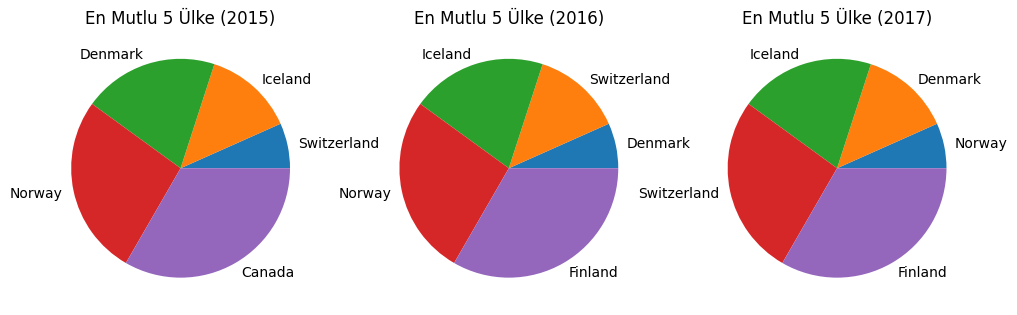

In [42]:
dataframes = [df_2015, df_2016, df_2017]
years = [2015, 2016, 2017]

fig, axs = plt.subplots(1, len(dataframes), figsize=(12, 4))

for ax, df, year in zip(axs, dataframes, years):
    # dataframe'deki ilk 5 row
    top_5 = df.head(5)
    
    # Country ve Happiness_Rank değerlerini al,
    labels = top_5['Country']
    sizes = top_5['Happiness_Rank']
    
    # piechart
    ax.pie(sizes, labels=labels)
    ax.set_title(f'En Mutlu 5 Ülke ({year})')

## Yıllara Göre Bölgelerin Mutluluk Ortalamaları

### 2015

In [43]:
region_lists=list(df_2015['Region'].unique())
region_happiness_ratio=[]

for each in region_lists:
    region = df_2015[df_2015['Region']==each]
    region_happiness_rate = sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


In [44]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Ortalama Skor')

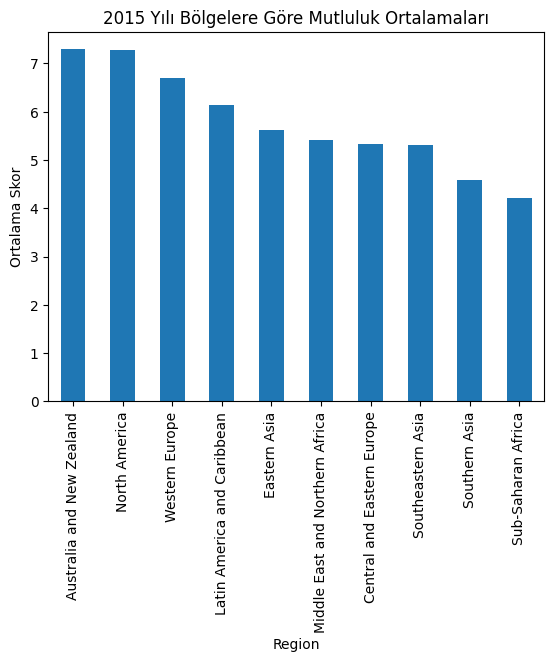

In [45]:
# bölge ve mutluluk skoru ortalamasına göre gruplama,
region_means1 = df_2015.groupby('Region')['Happiness_Score'].mean()

# Ortalama mutluluk skoruna göre azalarak sıralama,
region_means1 = region_means1.sort_values(ascending=False)

# Plot
region_means1.plot(kind='bar')
plt.title('2015 Yılı Bölgelere Göre Mutluluk Ortalamaları')
plt.ylabel('Ortalama Skor')

Text(0, 0.5, 'Ortalama Skor')

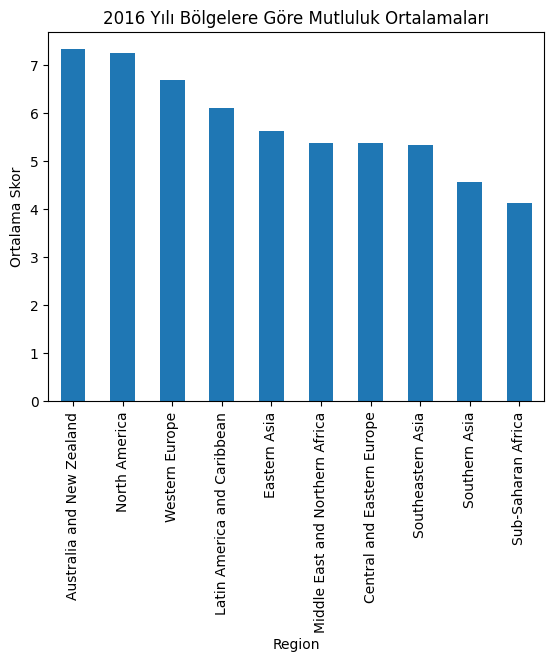

In [46]:
region_means2 = df_2016.groupby('Region')['Happiness_Score'].mean()

region_means2 = region_means2.sort_values(ascending=False)

region_means2.plot(kind='bar')
plt.title('2016 Yılı Bölgelere Göre Mutluluk Ortalamaları')
plt.ylabel('Ortalama Skor')

Text(0, 0.5, 'Ortalama Skor')

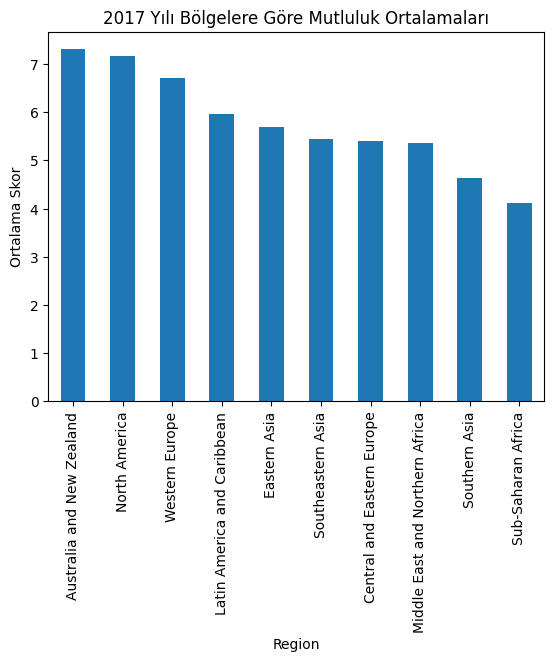

In [47]:
region_means3 = df_2017.groupby('Region')['Happiness_Score'].mean()

region_means3 = region_means3.sort_values(ascending=False)

region_means3.plot(kind='bar')
plt.title('2017 Yılı Bölgelere Göre Mutluluk Ortalamaları')
plt.ylabel('Ortalama Skor')

In [ ]:
region_lists=list(df_2016['Region'].unique())
region_happiness_ratio=[]

for each in region_lists:
    region = df_2016[df_2016['Region']==each]
    region_happiness_rate = sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

### Yıllara Göre Mutluluğu Azalan ve Artan Ülkeler

In [49]:
# Country ve Region colonlarıyla yeni bir df yaratalım.
df_together = pd.DataFrame(columns=['Country', 'Region'])

# Loop
for df, year in [(df_2015, 2015), (df_2016, 2016), (df_2017, 2017)]:
    # Yıla göre Happiness_Score Column'u
    col_name = f'Happiness_Score_{year}'
    df_together[col_name] = np.nan
    
    # Loop
    for _, row in df.iterrows():
        country = row['Country']
        happiness_score = row['Happiness_Score']
        region = row['Region']
        
        # Ülke df_together'da var mı
        if country in df_together['Country'].values:
            # varsa, happiness score'unu değiştir,
            df_together.loc[df_together['Country'] == country, col_name] = happiness_score
        else:
            # yoksa, df_together'a ilgili columnları ve mutluluk skorunu ekle
            df_together = df_together.append({'Country': country, 'Region': region, col_name: happiness_score}, ignore_index=True)

In [50]:
df_together

,Country,Region,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017
0,Switzerland,Western Europe,7.587,7.509,7.494
1,Iceland,Western Europe,7.561,7.501,7.504
2,Denmark,Western Europe,7.527,7.526,7.522
3,Norway,Western Europe,7.522,7.498,7.537
4,Canada,North America,7.427,7.404,7.316
...,...,...,...,...,...
161,Somaliland Region,Sub-Saharan Africa,NaN,5.057,NaN
162,Namibia,Sub-Saharan Africa,NaN,4.574,4.574
163,South Sudan,Sub-Saharan Africa,NaN,3.832,3.591
164,Taiwan Province of China,Eastern Asia,NaN,NaN,6.422


In [51]:
df_together.isnull().sum()

Country                  0
Region                   0
Happiness_Score_2015     8
Happiness_Score_2016     9
Happiness_Score_2017    11
dtype: int64

In [52]:
df_together = df_together.dropna()

In [53]:
x = df_together['Happiness_Score_2015']-df_together["Happiness_Score_2017"].round(3)

In [54]:
df_together['Score_Changes'] = x

C:\Users\kubil\AppData\Local\Temp\ipykernel_20104\1495281604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_together['Score_Changes'] = x


In [55]:
df_together.head()

,Country,Region,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017,Score_Changes
0,Switzerland,Western Europe,7.587,7.509,7.494,0.093
1,Iceland,Western Europe,7.561,7.501,7.504,0.057
2,Denmark,Western Europe,7.527,7.526,7.522,0.005
3,Norway,Western Europe,7.522,7.498,7.537,-0.015
4,Canada,North America,7.427,7.404,7.316,0.111


In [56]:
df_together = df_together.sort_values(by = ['Score_Changes'], ascending = [False])

In [57]:
df_together.head(5)

,Country,Region,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017,Score_Changes
22,Venezuela,Latin America and Caribbean,6.810,6.084,5.250,1.560
115,Liberia,Sub-Saharan Africa,4.571,3.622,3.533,1.038
118,Haiti,Latin America and Caribbean,4.518,4.028,3.603,0.915
114,Zimbabwe,Sub-Saharan Africa,4.610,4.193,3.875,0.735
84,Zambia,Sub-Saharan Africa,5.129,4.795,4.514,0.615


### Mutluluğu En Çok Azalmış ve Artmış Ülkeler

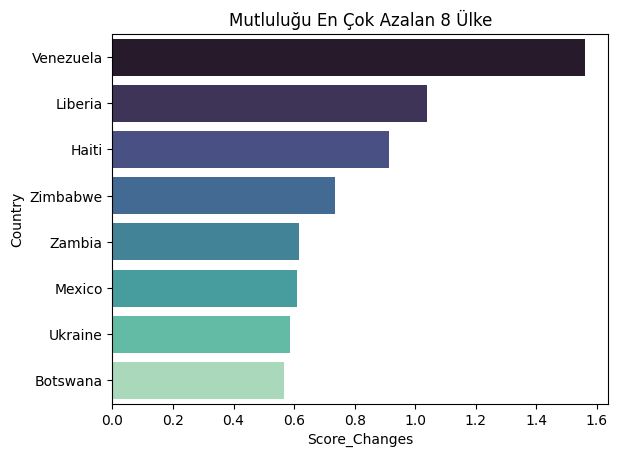

In [59]:
sns.barplot(y = df_together["Country"][:8], x = df_together["Score_Changes"][:8],palette = "mako")
plt.title('Mutluluğu En Çok Azalan 8 Ülke')
plt.show()

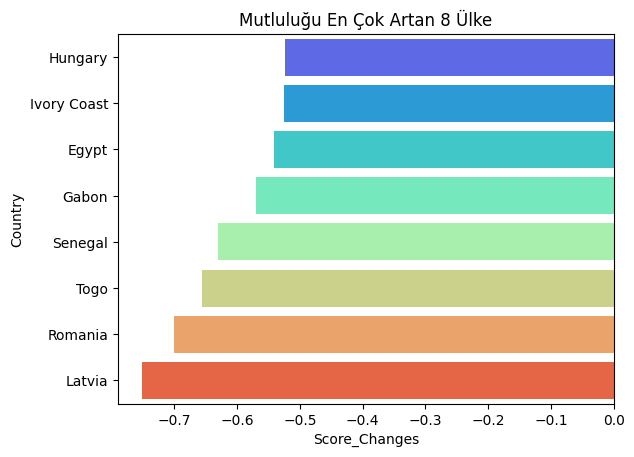

In [60]:
sns.barplot(y = df_together["Country"][-8:], x = df_together["Score_Changes"][-8:],palette="rainbow")
plt.title('Mutluluğu En Çok Artan 8 Ülke')
plt.show()